In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import tree

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)





In [2]:
# Lord data set
train_org=pd.read_csv('train.csv')
test_org=pd.read_csv('test.csv')

train=train_org.copy()
test=test_org.copy()

In [3]:
# Checking the dataset size
print('train data set size : ',train.shape)
print('test data set size  : ',test.shape)

train data set size :  (614, 13)
test data set size  :  (367, 12)


In [4]:
num_features=[]

for i in train_org.columns:
    if (train_org[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in train_org.columns:
    if (train_org[i].dtype=='object'):
        cat_features.append(i)
        
num_features,cat_features

(['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'],
 ['Loan_ID',
  'Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'])

In [5]:
train_org.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_org.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [8]:
train.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

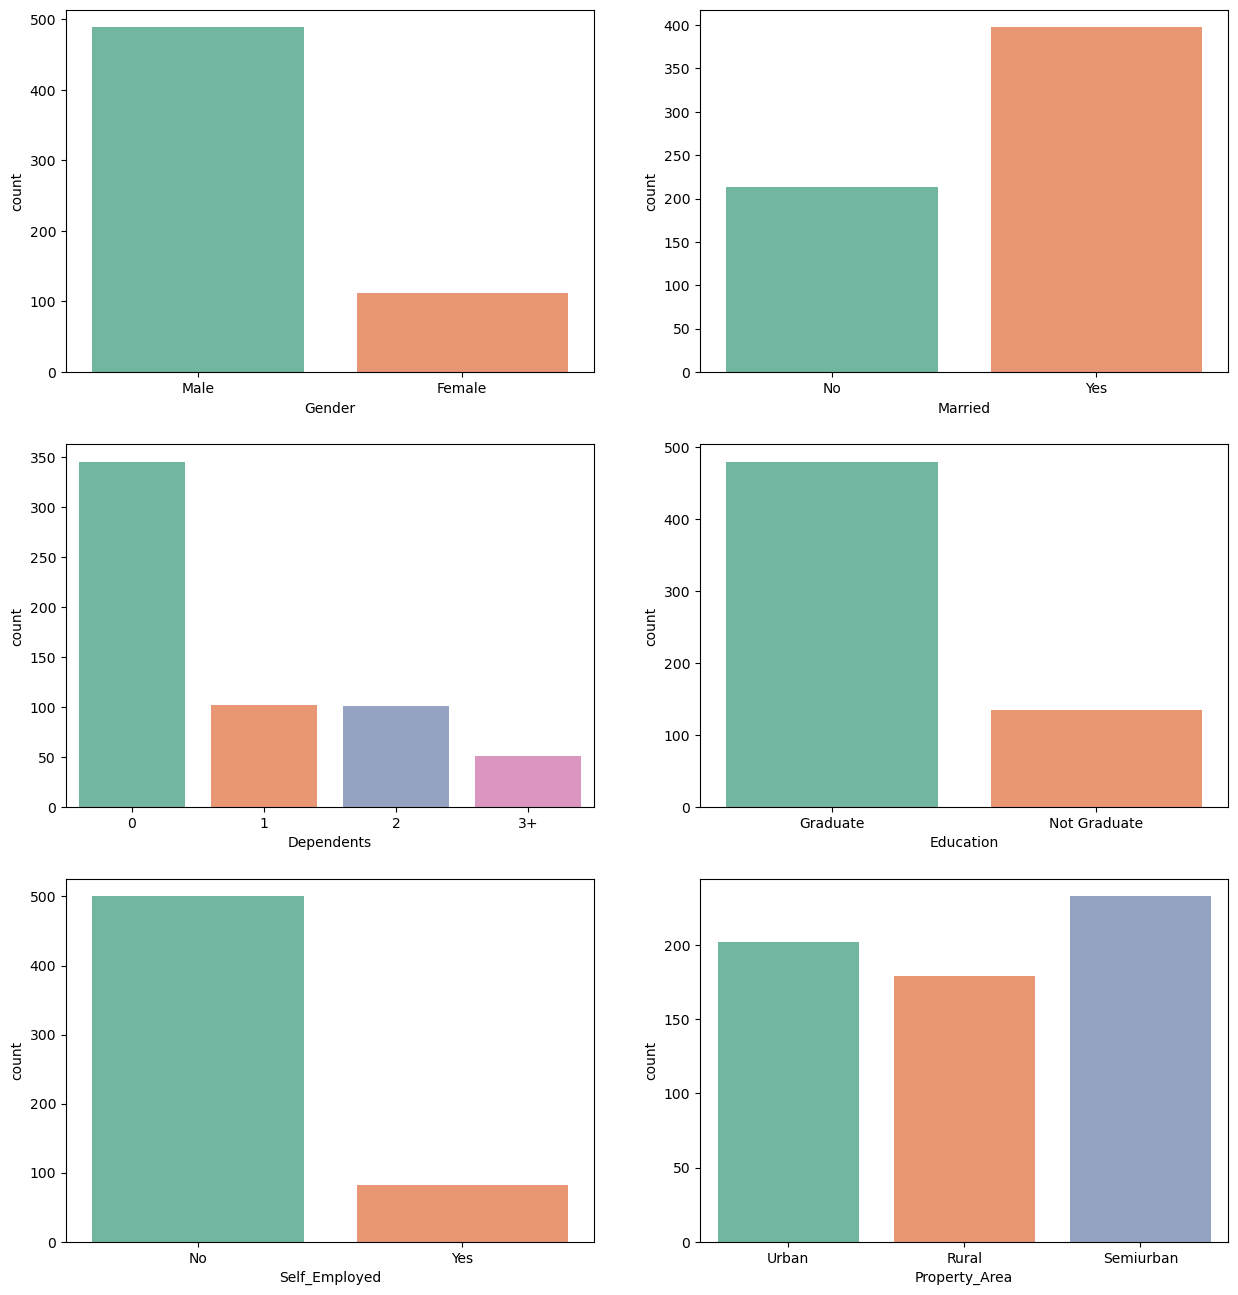

In [10]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(train['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(train['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(train['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(train['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(train['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(train['Property_Area'], ax=ax[2,1], palette='Set2')

In [11]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0,train


In [13]:
data.isnull().sum() 

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [14]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Dependents'] = data['Dependents'].fillna(train['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['LoanAmount'] = data['LoanAmount'].fillna(train['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [20]:
data.isnull().sum() 

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [21]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'No' : 0, 'Yes': 1})
data['Education'] = data['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})
data['Self_Employed'] = data['Self_Employed'].map({'No' : 0, 'Yes' : 1})
data['Property_Area'] = data['Property_Area'].map({'Urban' : 0, 'Rural' : 1, 'Semiurban' : 2})

In [22]:
data.isnull().sum() 

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [23]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

In [24]:
train.drop('source',axis=1,inplace=True)

In [25]:
test.drop('source',axis=1,inplace=True)

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0.0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1.0
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1.0


In [27]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
614,LP001015,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,0,NaN
615,LP001022,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,0,NaN
616,LP001031,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,0,NaN
617,LP001035,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,0,NaN
618,LP001051,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,0,NaN


In [28]:
train.shape

(614, 13)

In [29]:
test.shape

(367, 13)

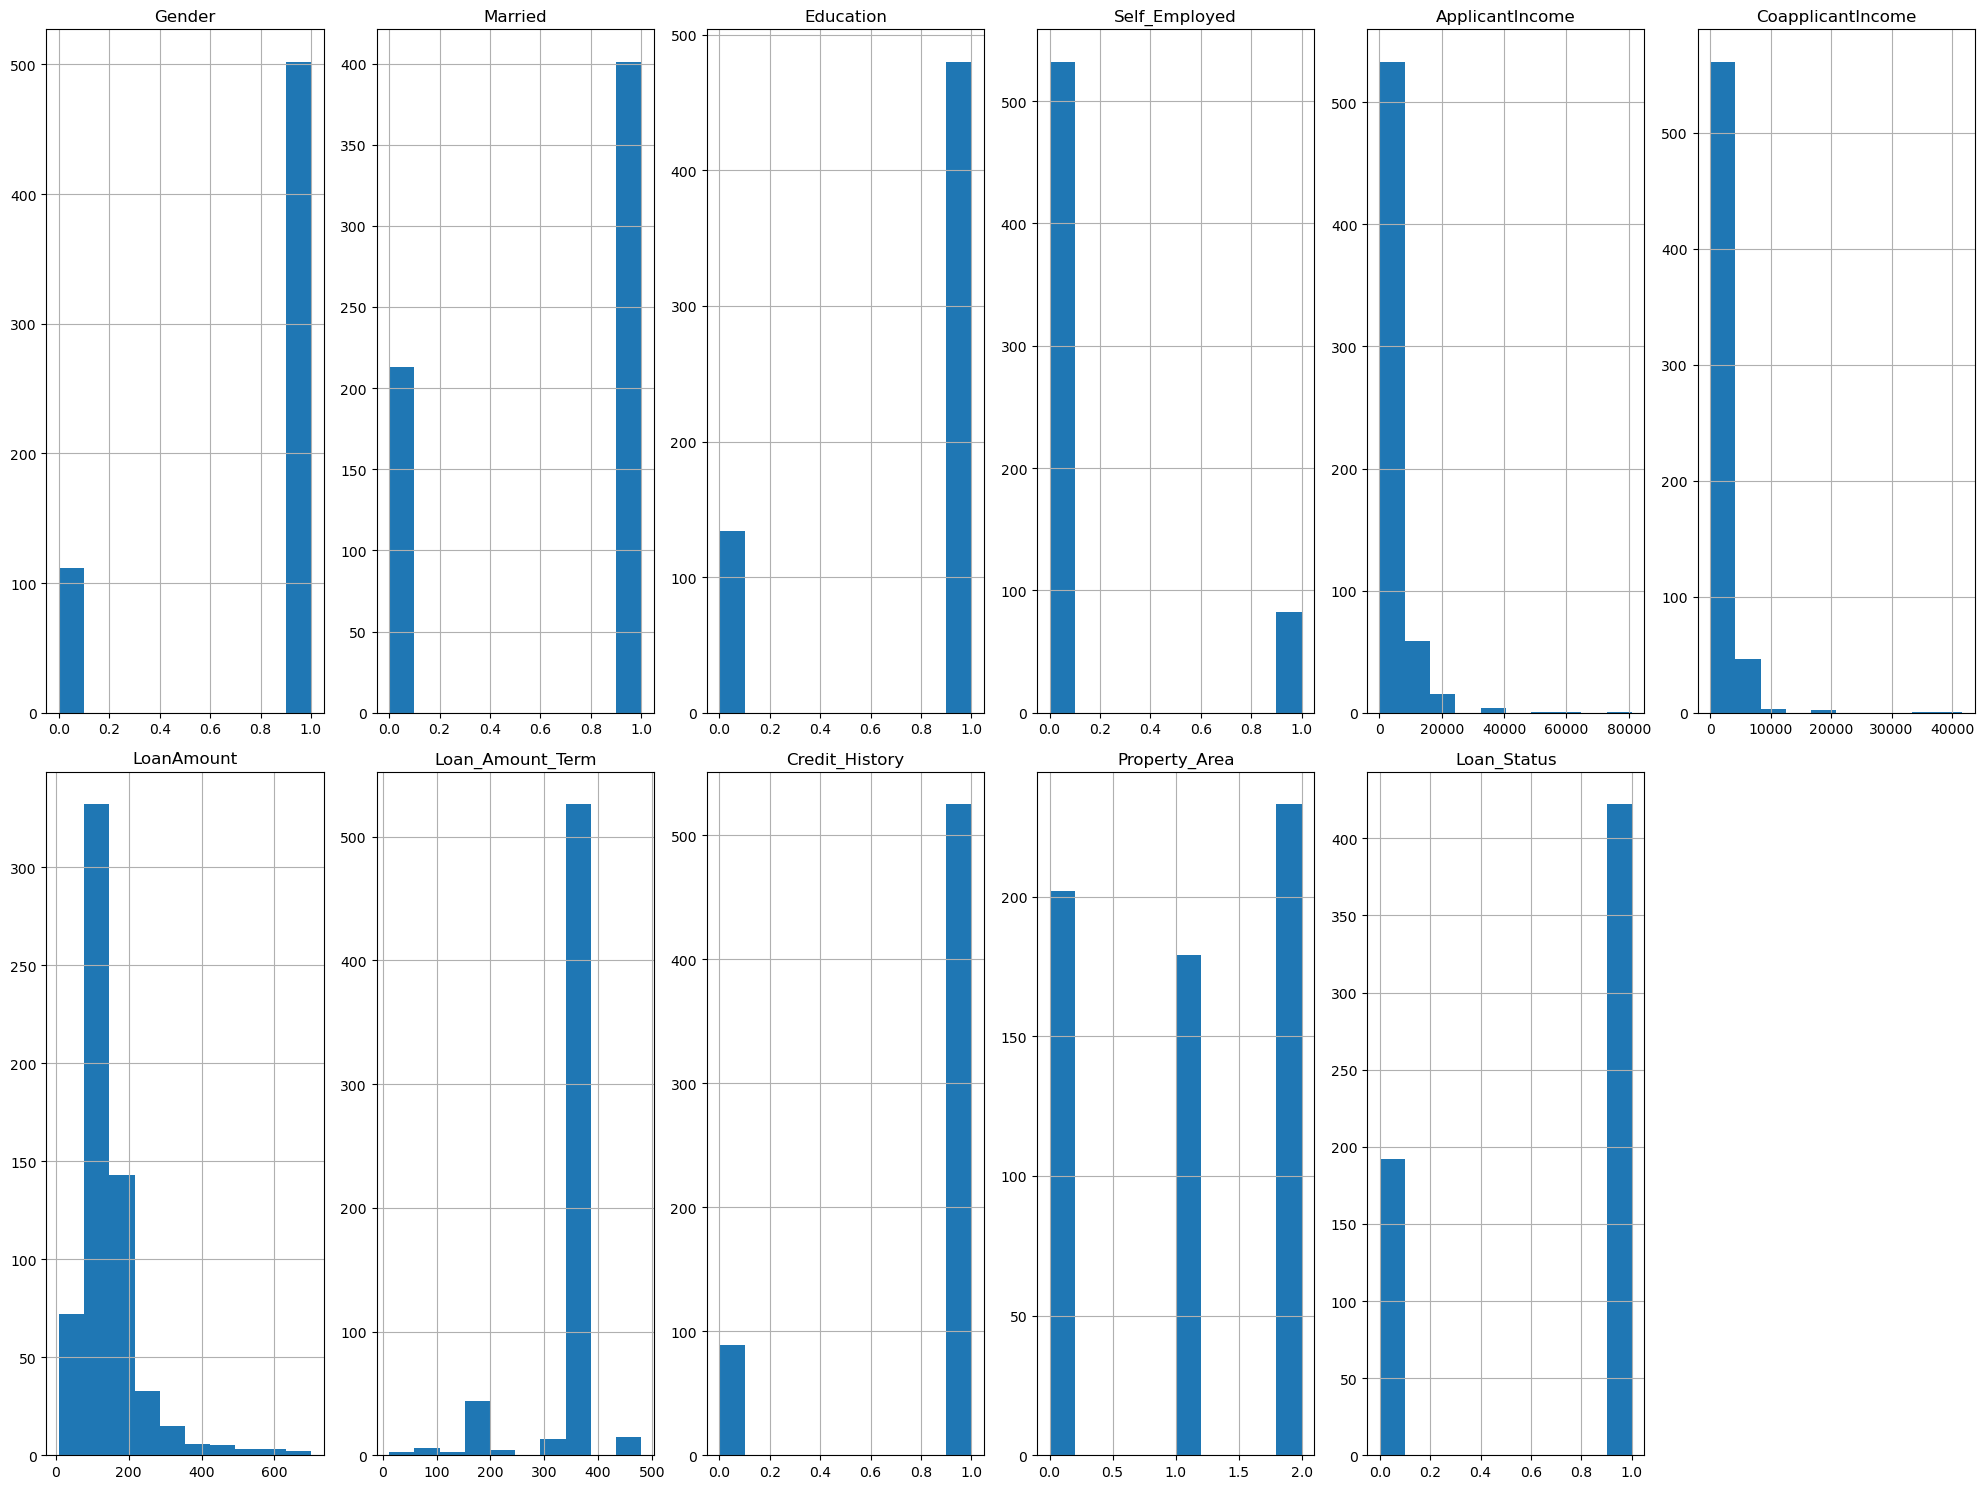

In [30]:
train.hist(figsize=(20,15),layout=(2,6))
plt.tight_layout()
plt.savefig('1_Wholedata.png')
plt.show()

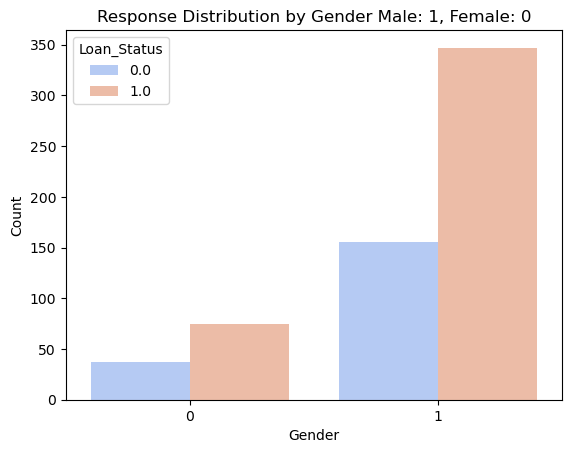

In [31]:
sns.countplot(x='Gender', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Gender Male: 1, Female: 0')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

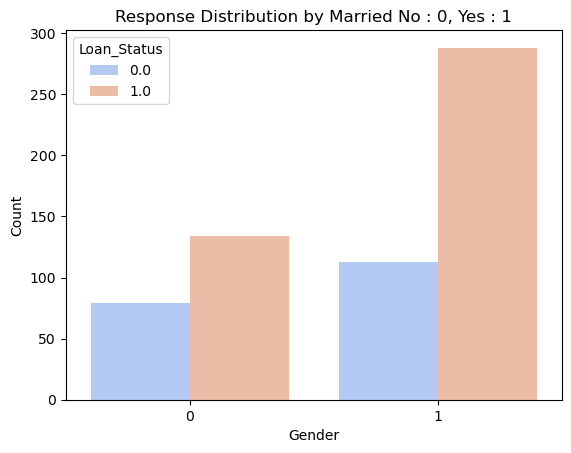

In [32]:
sns.countplot(x='Married', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Married No : 0, Yes : 1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

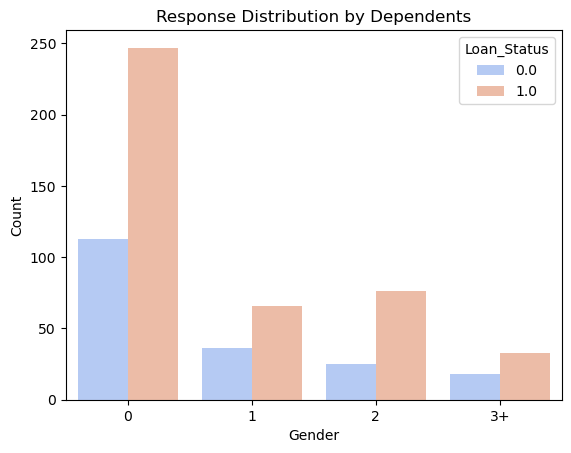

In [33]:
sns.countplot(x='Dependents', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Dependents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

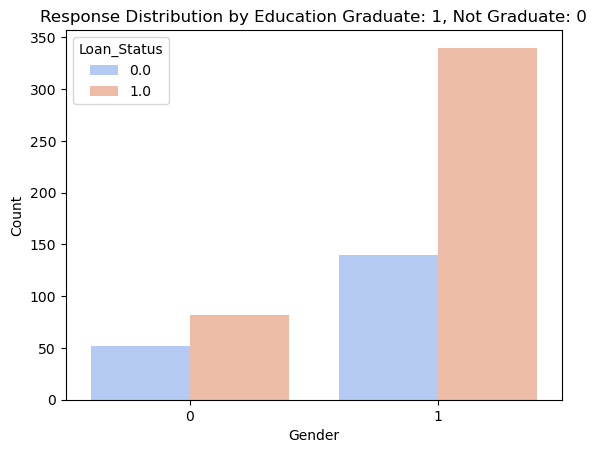

In [34]:
sns.countplot(x='Education', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Education Graduate: 1, Not Graduate: 0')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

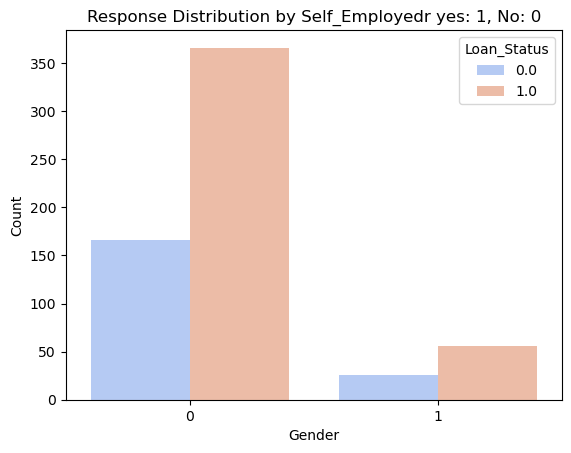

In [35]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Self_Employedr yes: 1, No: 0')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

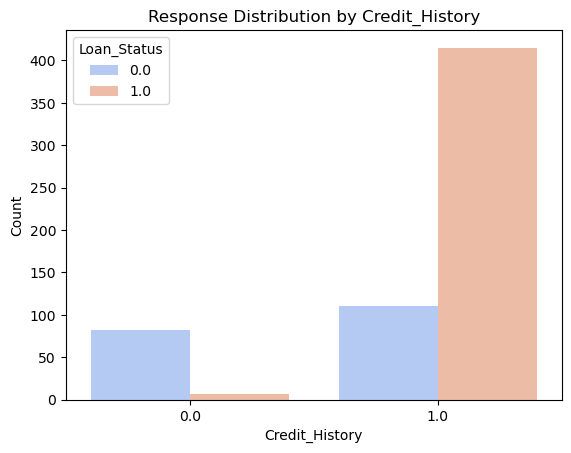

In [36]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train, palette='coolwarm')
plt.title('Response Distribution by Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show()

In [37]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status'].astype('int32')

In [38]:
print(train.isna().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [39]:
X.drop('Loan_ID',axis=1,inplace=True)

In [40]:
# Convert "Dependents" to numeric
X['Dependents'] = pd.to_numeric(X['Dependents'], errors='coerce')

# Check data types after conversion
data_types = X.dtypes
print("Updated Data Types in X:")
print(data_types)


Updated Data Types in X:
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object


In [41]:
print(X.isna().sum())


Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64


In [42]:
from sklearn.impute import SimpleImputer

# Create an imputer with strategy 'median' (you can use 'mean' if you prefer)
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the 'Dependents' column
X['Dependents'] = imputer.fit_transform(X[['Dependents']])


In [43]:
print(X.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [45]:


models = [
    ('LogisticRegression', LogisticRegression(solver="liblinear", random_state=5)),
    ('DecisionTree', DecisionTreeClassifier(random_state=5)),
    ('RandomForest', RandomForestClassifier(random_state=5)),
    ('KNN', KNeighborsClassifier())
]

results = []
names = []

for name, model in models:
    kf = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_score = cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
    
    # Check for NaN values in the results
    if pd.Series(cv_score).isna().any():
        print(f"NaN values detected in cross-validation scores for {name}. Check your data or model parameters.")
    else:
        results.append(cv_score)
        names.append(name)
        msg = f"{name}: {cv_score.mean()} ({cv_score.std()})"
        print(msg)


LogisticRegression: 0.8078102092496333 (0.0319850947813344)
DecisionTree: 0.7295348527255765 (0.047145075459530804)
RandomForest: 0.7915367186458748 (0.023277515026462497)
KNN: 0.6335332533653206 (0.0264366020620967)


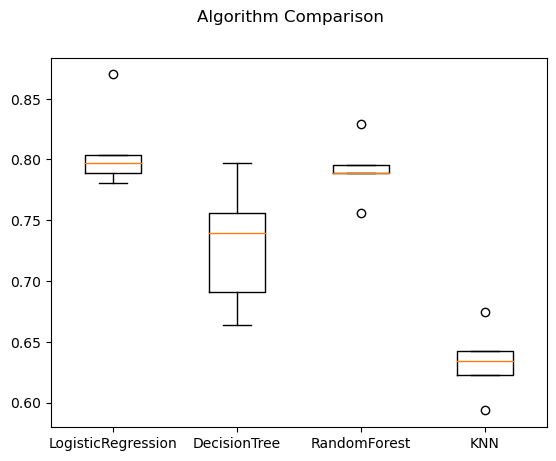

In [46]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig('2_Algorithm Comparison.png')
plt.show()

In [47]:
train['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_balanced, y_balanced = smote.fit_resample(X, y)

In [49]:
y_balanced

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

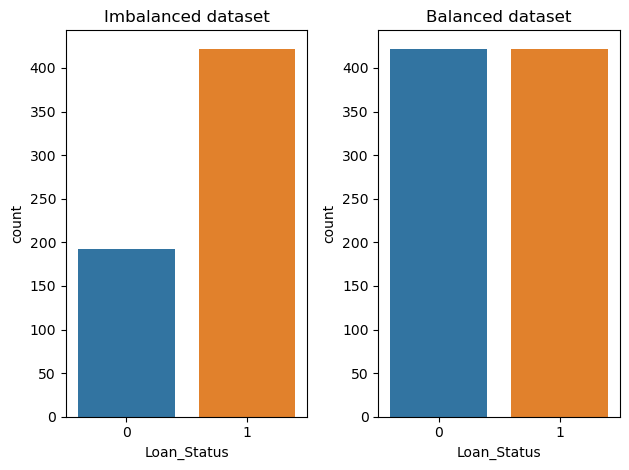

In [50]:
plt.subplot(121)
sns.countplot(y)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_balanced)
plt.title('Balanced dataset')

plt.savefig('1_Imbalanced amd Balanced dataset.png')
plt.tight_layout()
plt.show()

In [51]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True, random_state=5)
    cv_score=cross_val_score(model,X_balanced, y_balanced,cv=kf,scoring='accuracy',verbose=1)
    results.append(cv_score)
    names.append(name)
    #acc = model.score(X_test_balanced, y_test_balanced)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std(),)
    print(msg)

LogisticRegression: 0.765378 (0.026855)
DecisionTree: 0.755889 (0.043117)
RandomForest: 0.836447 (0.027478)
KNN: 0.621978 (0.041839)


In [52]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True, random_state=5)
    cv_score=cross_val_score(model,X_balanced,y_balanced,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    #acc = model.score(X_test_balanced, y_test_balanced)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std(),)
    print(msg)

LogisticRegression: 0.836111 (0.038080)
DecisionTree: 0.756897 (0.041488)
RandomForest: 0.905815 (0.010957)
KNN: 0.653683 (0.035479)


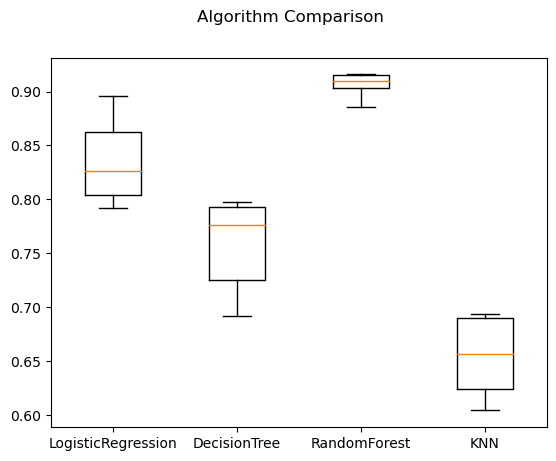

In [53]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig('2_Algorithm Comparison.png')
plt.show()

In [54]:
# define the model
CROSS_MODEL_1 = RandomForestClassifier()
# evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=5)
n_scores = cross_val_score(model,X_balanced,y_balanced, scoring='accuracy', cv=kf)
# report performance
print('Accuracy: %f (%f)' % (n_scores.mean(), n_scores.std()))


Accuracy: 0.621978 (0.041839)


In [55]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100],
   'max_features': [2, 3,5],
   'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
kf=KFold(n_splits=2,shuffle=True, random_state=5)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf, n_jobs = -1, verbose = 2)
LOAN_MODEL = grid_search.fit(X_balanced,y_balanced)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


In [56]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 2, 'n_estimators': 300}

In [57]:
grid_search.best_score_

0.8293838862559242

In [58]:
# Save the original Loan_ID column to a new data file
loan_ids = test['Loan_ID'].copy()
loan_ids.to_csv('loan_ids.csv', index=False)

In [59]:
test = test.drop('Loan_ID', axis=1)

In [60]:
test['Numerical_ID'] = range(1, len(test) + 1)

In [61]:
test = test.drop('Loan_Status', axis=1)

In [62]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Numerical_ID
614,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,0,1
615,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,0,2
616,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,0,3
617,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,0,4
618,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,0,5


In [63]:
test.shape

(367, 12)

In [64]:
# PREDSTEST = LOAN_MODEL.predict(test)
# PREDSTEST